In [47]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Checking the datatype of all the columns 

In [51]:
df.shape

(194673, 38)

In [52]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [53]:
# We drop all columns expect the listed above
df.drop(df.columns.difference(['SEVERITYDESC', 'ADDRTYPE', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'WEATHER', 'LIGHTCOND'])\
, axis=1, inplace=True)
df.head()

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight
1,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On
2,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight
3,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
4,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight


In [54]:
#show in a df format null value in boolean results
null_values=df.isnull()
null_values

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [55]:
# Check null elements
for column in null_values.columns.values.tolist():
    print(column)
    print(null_values[column].value_counts().sort_values(ascending=True))
    print("")

ADDRTYPE
True       1926
False    192747
Name: ADDRTYPE, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

JUNCTIONTYPE
True       6329
False    188344
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLDESC
False    194673
Name: SDOT_COLDESC, dtype: int64

WEATHER
True       5081
False    189592
Name: WEATHER, dtype: int64

LIGHTCOND
True       5170
False    189503
Name: LIGHTCOND, dtype: int64



In [56]:
#gives statistics for categorical variables
df.describe(include='O')

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
count,192747,194673,188344,194673,189592,189503
unique,3,2,7,39,11,9
top,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
freq,126926,136485,89800,85209,111135,116137


In [57]:
df_with_nans=df.dropna()
df_with_nans.shape

(182954, 6)

In [58]:
a=(1-(182954/194673))*100
print("%.2f" % a,"%")

6.02 %


In [59]:
# With 6.02% rows with nans, we will drop these rows
df=df.dropna()
df.shape

(182954, 6)

In [60]:
df


,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight
1,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On
2,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight
3,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
4,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight
5,Intersection,Property Damage Only Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
6,Intersection,Property Damage Only Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight
7,Intersection,Injury Collision,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Daylight
8,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
9,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight


In [61]:
# we will reset index to correct rows numbers
df=df.reset_index(drop=True)
df

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight
1,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On
2,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight
3,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
4,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight
5,Intersection,Property Damage Only Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
6,Intersection,Property Damage Only Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight
7,Intersection,Injury Collision,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Daylight
8,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
9,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight


In [62]:
#Also check to confirm no more null values
df.isnull().sum()

ADDRTYPE        0
SEVERITYDESC    0
JUNCTIONTYPE    0
SDOT_COLDESC    0
WEATHER         0
LIGHTCOND       0
dtype: int64

In [63]:

#Check groups of features
print("ADDRTYPE: \n", df['ADDRTYPE'].value_counts() )
print("LIGHTCOND: \n",df['LIGHTCOND'].value_counts())

print("\n WEATHER: \n",df['WEATHER'].value_counts())
print("\n JUNCTIONTYPE: \n",df['JUNCTIONTYPE'].value_counts())
print("\n SDOT_COLDESC: \n",df['SDOT_COLDESC'].value_counts())

ADDRTYPE: 
 Block           119393
Intersection     63326
Alley              235
Name: ADDRTYPE, dtype: int64
LIGHTCOND: 
 Daylight                    113868
Dark - Street Lights On      47563
Unknown                      10453
Dusk                          5775
Dawn                          2454
Dark - No Street Lights       1462
Dark - Street Lights Off      1158
Other                          210
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

 WEATHER: 
 Clear                       109084
Raining                      32653
Overcast                     27200
Unknown                      11642
Snowing                        881
Other                          747
Fog/Smog/Smoke                 556
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

 JUNCTIONTYPE: 
 Mid-Block (not related to intersection)              86635
At Intersection (intersection

<h3> Data Visualisation and Exploratory </h3>

(-1000, 80000)

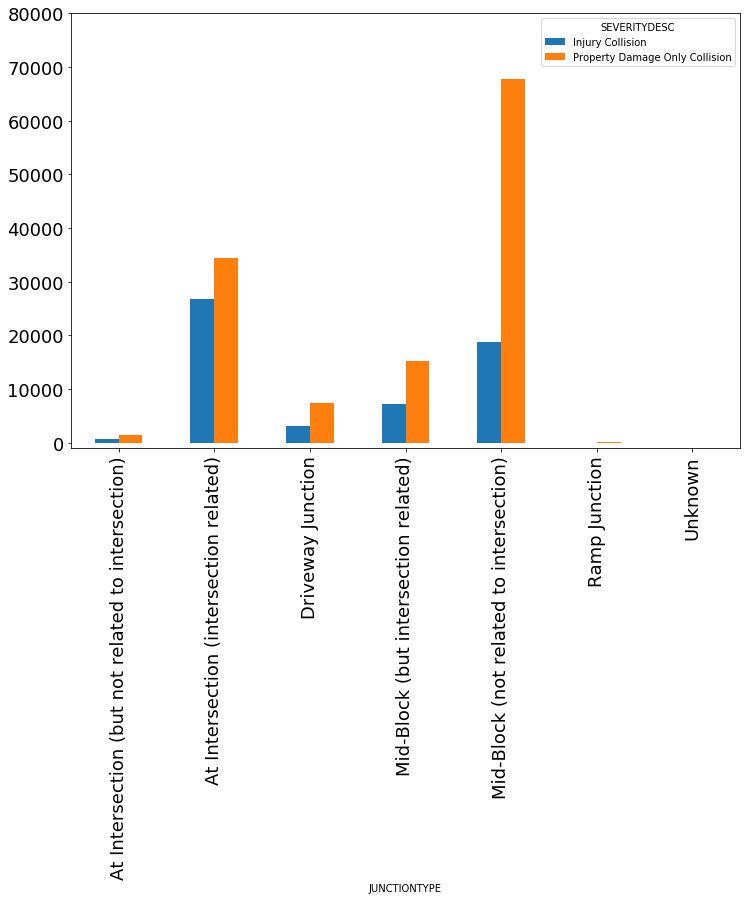

In [64]:
df.groupby(['JUNCTIONTYPE', 'SEVERITYDESC']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(12, 8), fontsize=18)
plt.ylim((-1000,80000))

(-1000, 100000)

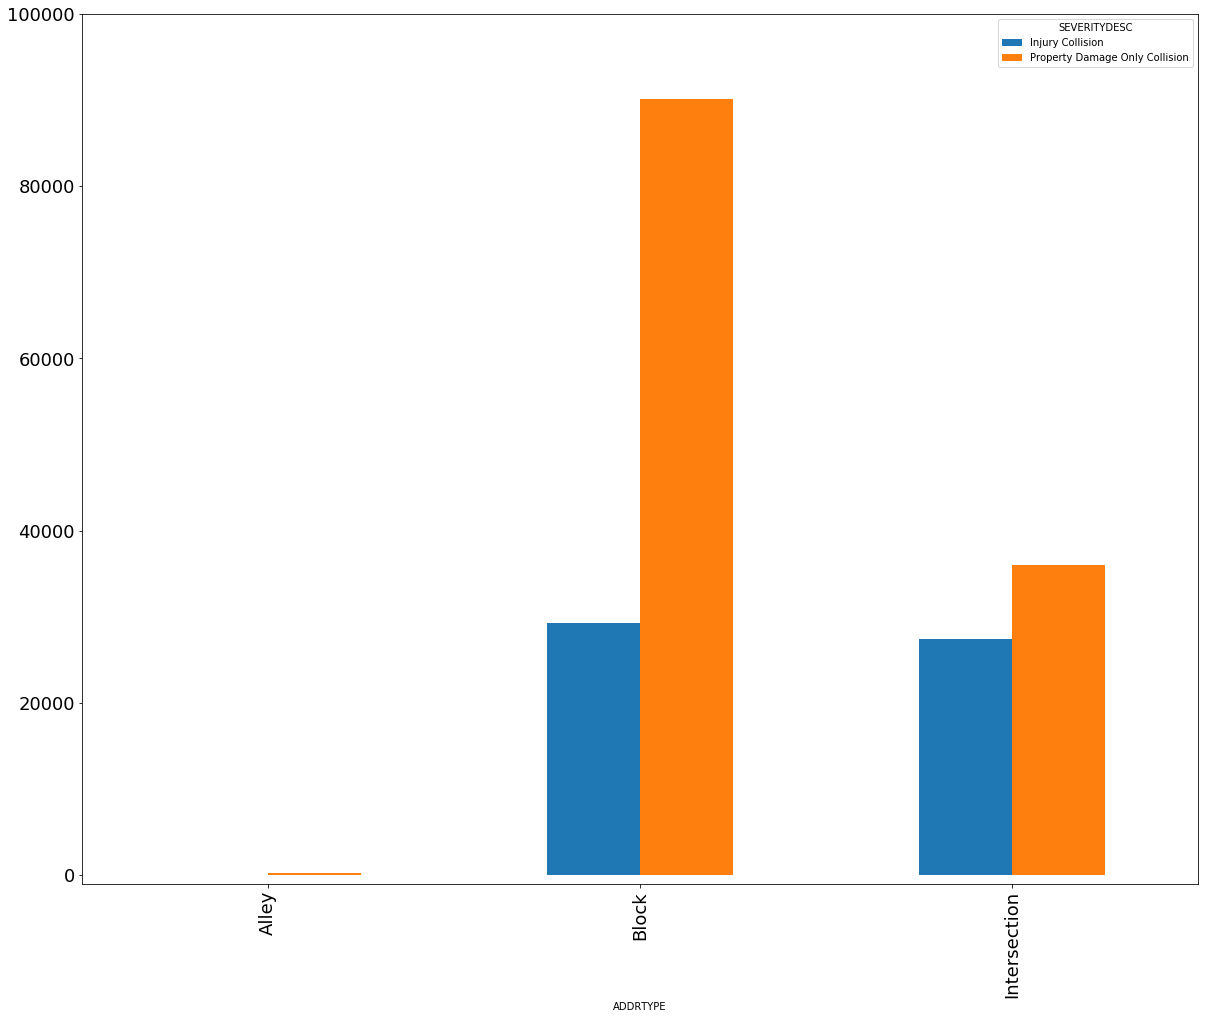

In [65]:
df.groupby(['ADDRTYPE', 'SEVERITYDESC']).agg('size').unstack().plot(kind = 'bar', figsize=(20,16), legend=True, fontsize=18)
plt.ylim((-1000, 100000))

<h3>Data Wrangling (Back)</h3>
Looking at the elements I am going to use One Hot Encoding to turn these categorical variables to numerical variables but before we will check data type and convert them

In [71]:
df.dtypes

ADDRTYPE          int8
SEVERITYDESC    object
JUNCTIONTYPE      int8
SDOT_COLDESC      int8
WEATHER           int8
LIGHTCOND         int8
dtype: object

In [75]:
df['ADDRTYPE']=df['ADDRTYPE'].astype('object')

df['JUNCTIONTYPE']=df['JUNCTIONTYPE'].astype('object')

df['SDOT_COLDESC']=df['SDOT_COLDESC'].astype('object')

df['WEATHER']=df['WEATHER'].astype('object')

df['LIGHTCOND']=df['LIGHTCOND'].astype('object')

In [76]:
df.dtypes

ADDRTYPE        object
SEVERITYDESC    object
JUNCTIONTYPE    object
SDOT_COLDESC    object
WEATHER         object
LIGHTCOND       object
dtype: object

In [77]:
Feature=df['SEVERITYDESC']
Feature=pd.concat([Feature, pd.get_dummies(df[['ADDRTYPE','JUNCTIONTYPE','SDOT_COLDESC','WEATHER','LIGHTCOND']])], axis=1)

Feature.head()

,SEVERITYDESC,ADDRTYPE_0,ADDRTYPE_1,ADDRTYPE_2,JUNCTIONTYPE_0,JUNCTIONTYPE_1,JUNCTIONTYPE_2,JUNCTIONTYPE_3,JUNCTIONTYPE_4,JUNCTIONTYPE_5,...,WEATHER_10,LIGHTCOND_0,LIGHTCOND_1,LIGHTCOND_2,LIGHTCOND_3,LIGHTCOND_4,LIGHTCOND_5,LIGHTCOND_6,LIGHTCOND_7,LIGHTCOND_8
0,Injury Collision,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,Injury Collision,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [78]:
Feature.drop(['SEVERITYDESC'], axis=1, inplace=True)
Feature

,ADDRTYPE_0,ADDRTYPE_1,ADDRTYPE_2,JUNCTIONTYPE_0,JUNCTIONTYPE_1,JUNCTIONTYPE_2,JUNCTIONTYPE_3,JUNCTIONTYPE_4,JUNCTIONTYPE_5,JUNCTIONTYPE_6,...,WEATHER_10,LIGHTCOND_0,LIGHTCOND_1,LIGHTCOND_2,LIGHTCOND_3,LIGHTCOND_4,LIGHTCOND_5,LIGHTCOND_6,LIGHTCOND_7,LIGHTCOND_8
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [79]:
X=Feature
X[0:5]

,ADDRTYPE_0,ADDRTYPE_1,ADDRTYPE_2,JUNCTIONTYPE_0,JUNCTIONTYPE_1,JUNCTIONTYPE_2,JUNCTIONTYPE_3,JUNCTIONTYPE_4,JUNCTIONTYPE_5,JUNCTIONTYPE_6,...,WEATHER_10,LIGHTCOND_0,LIGHTCOND_1,LIGHTCOND_2,LIGHTCOND_3,LIGHTCOND_4,LIGHTCOND_5,LIGHTCOND_6,LIGHTCOND_7,LIGHTCOND_8
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [80]:
y=df['SEVERITYDESC'].values
y[0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

In [81]:
print("Feature shape:", Feature.shape)
print("X shape:",X.shape)
print ("y shape:", y.shape)

Feature shape: (182954, 69)
X shape: (182954, 69)
y shape: (182954,)


<h2> MODEL DEVELOPMENT </h2>

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('train set:', X_train.shape, y_train.shape)
print('test set:', X_test.shape, y_test.shape)

train set: (146363, 69) (146363,)
test set: (36591, 69) (36591,)


<h2> DECISION TREE </h2>

In [83]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [84]:

#Modelling phase
Accident_Severity_Model=DecisionTreeClassifier(criterion='entropy', max_depth=5)
Accident_Severity_Model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:

#Predicting phase
Predicting_Severity=Accident_Severity_Model.predict(X_test)
print(Predicting_Severity [0:5])
print(y_test [0:5])

['Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision']
['Property Damage Only Collision' 'Injury Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Injury Collision']


In [86]:
#Accuracy of the model using sklearn
from sklearn import metrics
print("Decision Tress Accuracy:", metrics.accuracy_score(y_test, Predicting_Severity))


Decision Tress Accuracy: 0.7380503402476019


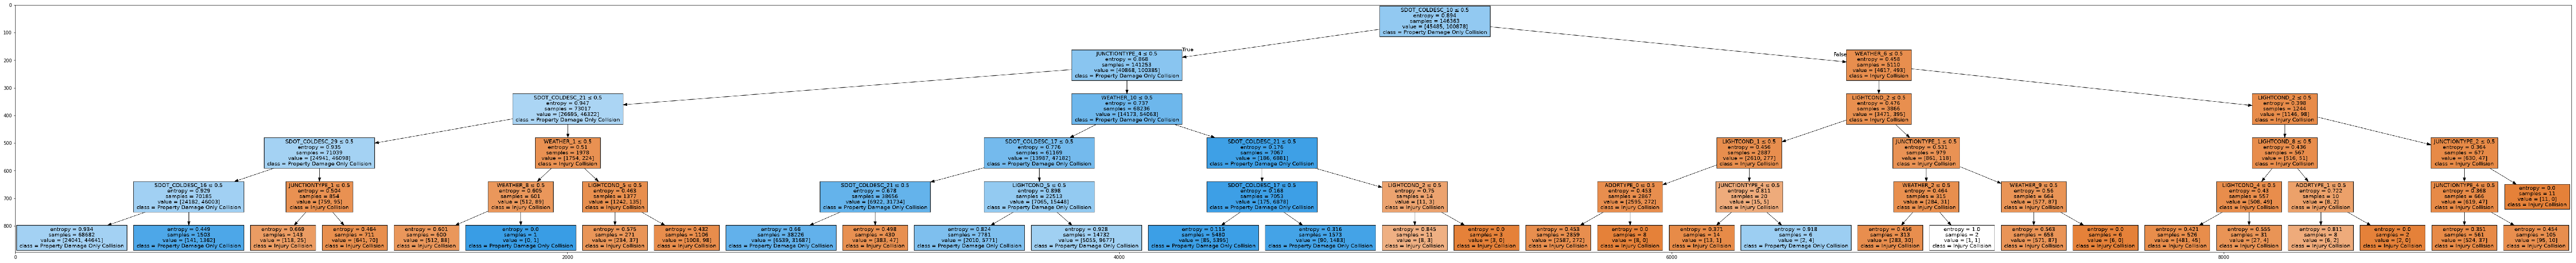

In [95]:
#for visualization of the model
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data=StringIO()
filename="Severity_Tree.png"
featureNames=Feature.columns
out=tree.export_graphviz(Accident_Severity_Model, feature_names=featureNames, out_file=dot_data, class_names=np.unique(y_train),\
                        filled=True, special_characters=True, rotate=False)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img=mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')